In [4]:
#1，	导入文本
#2，	文本预处理（降噪，切分词，去除停用词即高频功能词）
#3，	文本向量化（词袋模型，以字典的方式存储，为了计算余项弦相似度，统一向量维度），
##a)	每一个文本成为一个向量，
#b)	label是文本名称
#c)	vecteur向量值是整个文本的向量值，是文本中去除停用词后的词频字典

import os
import re
import string 
import json


def text2label_vecteur(my_files) -> json:
    labels_list = []
    label = ""
    my_files = "/Users/juliezhao/Desktop/cluster_30_AN/livre_A_N"
    list_files = os.listdir(my_files)
    term_to_remove = ".DS_Store"
    list_files.remove(term_to_remove)
    list_files_sorted = sorted(list_files)
    
    data_label_vecteur_total = []
    total_list_normalized_tokenized_filtered = []
    total_list_normalized_tokenized_filtered = combine_files(list_files_sorted)
    
    for i in range(len(list_files_sorted)):
        label = list_files_sorted[i]
        my_file_path_current = my_files+'/'+label
        my_file_current = open(my_file_path_current,mode = 'r', encoding='utf8')
        my_file_conteneur = my_file_current.read()
        #normalize
        my_file_conteneur_normalized = normalize(my_file_conteneur)
        #tokenize
        my_file_conteneur_normalized_tokenized = tokenize(my_file_conteneur_normalized)
        #filtrer
        stop_words = read_stop_words("/Users/juliezhao/Desktop/cluster_30_AN/stopword.rtf")
        my_file_conteneur_normalized_tokenized_filtered = filter_tokens(my_file_conteneur_normalized_tokenized,stop_words)
        #vecteur
        vecteur = generate_vector(total_list_normalized_tokenized_filtered, my_file_conteneur_normalized_tokenized_filtered)        
        #label+vecteur_uni
        data_label_vecteur = labeliser(label, vecteur)
        #将label和对应vecteur以字典形式存入json格式的文件中
        with open("/Users/juliezhao/Desktop/cluster_30_AN/output/"+ str(list_files_sorted[i]), 'w', encoding= 'utf8') as file:
        # 使用json.dump()将字典写入文件
            json.dump(data_label_vecteur, file)#乱码怎么处理？？？暂时忽略，直接调用 
        data_label_vecteur_total.append(data_label_vecteur)
            
    return data_label_vecteur_total 
#test        
aaaa=text2label_vecteur("/Users/juliezhao/Desktop/cluster_30_AN/livre_A_N")



In [5]:
#test
print(aaaa[7][0]['vecteur'].values())
print(aaaa[9][0])
print(aaaa[28][0]['label'])
print(len(aaaa))


dict_values([177, 2, 256, 409, 17, 4, 462, 282, 56, 17, 82, 70, 28, 10, 0, 0, 313, 1, 15, 523, 1, 360, 1, 31, 136, 0, 19, 2, 1, 4, 1195, 185, 600, 1, 15, 6, 23, 336, 17, 128, 7, 144, 23, 223, 2, 0, 421, 1, 4, 4, 329, 0, 0, 298, 24, 0, 590, 5, 19, 5, 33, 113, 8, 0, 193, 0, 231, 12, 104, 0, 717, 17, 103, 2, 6, 36, 0, 7, 7, 22, 49, 5, 331, 0, 42, 13, 2, 0, 447, 122, 0, 10, 2, 5, 11, 0, 8, 248, 64, 6, 37, 407, 3, 0, 2, 4, 71, 9, 1, 19, 1, 12, 19, 7, 17, 0, 10, 0, 0, 180, 0, 1, 4, 0, 1, 4, 23, 0, 8, 2, 194, 1, 72, 16, 0, 2, 17, 5, 2, 0, 0, 152, 1, 1, 15, 1, 5, 71, 18, 1, 3, 1, 16, 7, 10, 12, 11, 0, 0, 7, 0, 0, 123, 6, 1, 1, 147, 0, 1, 77, 2, 10, 10, 1, 7, 0, 6, 32, 42, 31, 11, 242, 0, 15, 1, 0, 62, 0, 13, 4, 4, 0, 2, 0, 19, 0, 0, 0, 0, 36, 12, 3, 2, 186, 29, 5, 4, 378, 4, 3, 4, 0, 1, 4, 2, 0, 3, 0, 0, 59, 1, 0, 0, 2, 8, 1, 0, 1, 36, 0, 2, 165, 2, 13, 10, 2, 58, 1, 0, 2, 3, 0, 0, 1, 1, 23, 0, 19, 25, 0, 0, 5, 0, 0, 2, 0, 2, 0, 0, 0, 58, 0, 3, 11, 5, 0, 0, 17, 2, 4, 0, 0, 84, 0, 0, 17, 0, 243

In [6]:
#test
vecteur_a = aaaa[9][0]['vecteur']
vecteur_b = aaaa[10][0]['vecteur']
print(list((vecteur_a.values()))[7])

208


In [9]:
#calcul cos
import math
def sim_cos(vecteur_a, vecteur_b, dimension_n):
    
    a_plus_b = 0
    a_multi_b = 0
    vecteur_a_module_square = 0
    vecteur_b_module_square = 0
        
    
    for value_a, value_b in zip(vecteur_a.values(), vecteur_b.values()):
        #numerator
        a_multi_b = value_a * value_b
        a_plus_b += a_multi_b

        #denominator
        vecteur_a_module_square += value_a**2
        vecteur_a_module = math.sqrt(vecteur_a_module_square)
        
        vecteur_b_module_square += value_b**2
        vecteur_b_module = math.sqrt(vecteur_b_module_square)
        
        #calcul
        vecteur_a_b_module = vecteur_a_module * vecteur_b_module
        cos_a_b = a_plus_b/vecteur_a_b_module
        
    return cos_a_b

In [10]:
#calcul euclidean
import math
def euclidean_distance(vecteur_a,vecteur_b):
    
    euclidean_distance = 0
    for value_a, value_b in zip(vecteur_a.values(), vecteur_b.values()):
        vecteur_a_moins_b = value_a - value_b
        vecteur_a_moins_b_puissance2 = vecteur_a_moins_b**2
        euclidean_distance += math.sqrt(vecteur_a_moins_b_puissance2)
    return euclidean_distance

In [11]:
#matrix_euclidean
matrix_euclidean = []
for i in range(30):
    ligne_vertical= []
    for j in range(30):
        vecteur_a = aaaa[i][0]['vecteur']
        vecteur_b = aaaa[j][0]['vecteur']
        ddd = euclidean_distance(vecteur_a, vecteur_b)
        ligne_vertical.append(ddd)
    matrix_euclidean.append(ligne_vertical)

print(matrix_euclidean)

[[0.0, 21152.0, 28653.0, 21130.0, 15695.0, 18558.0, 17034.0, 21712.0, 22435.0, 24519.0, 26363.0, 25290.0, 21311.0, 23958.0, 26523.0, 20607.0, 22669.0, 25441.0, 20761.0, 27276.0, 23301.0, 24180.0, 24520.0, 28282.0, 24577.0, 27565.0, 28758.0, 22776.0, 25169.0, 28173.0], [21152.0, 0.0, 18325.0, 12500.0, 15223.0, 12930.0, 14778.0, 10806.0, 10023.0, 15535.0, 12687.0, 12602.0, 10395.0, 12550.0, 13875.0, 12781.0, 12777.0, 12893.0, 12083.0, 15072.0, 14449.0, 13492.0, 12748.0, 15850.0, 13107.0, 14941.0, 16248.0, 13364.0, 16327.0, 15939.0], [28653.0, 18325.0, 0.0, 20653.0, 18530.0, 21199.0, 20387.0, 15809.0, 16190.0, 8912.0, 15494.0, 14771.0, 20372.0, 13125.0, 10040.0, 21692.0, 13726.0, 10046.0, 14028.0, 10455.0, 11416.0, 11659.0, 13605.0, 10421.0, 18804.0, 15564.0, 13229.0, 13141.0, 11000.0, 16578.0], [21130.0, 12500.0, 20653.0, 0.0, 15701.0, 11674.0, 12874.0, 11552.0, 12213.0, 16971.0, 14811.0, 13828.0, 13101.0, 13994.0, 16497.0, 11927.0, 12763.0, 15627.0, 13493.0, 16578.0, 15889.0, 15228.0, 1

/var/folders/6b/_88flt7d4z5_7bbd6xsk193h0000gn/T/ipykernel_27919/3020066459.py:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(euclidean, method='average')


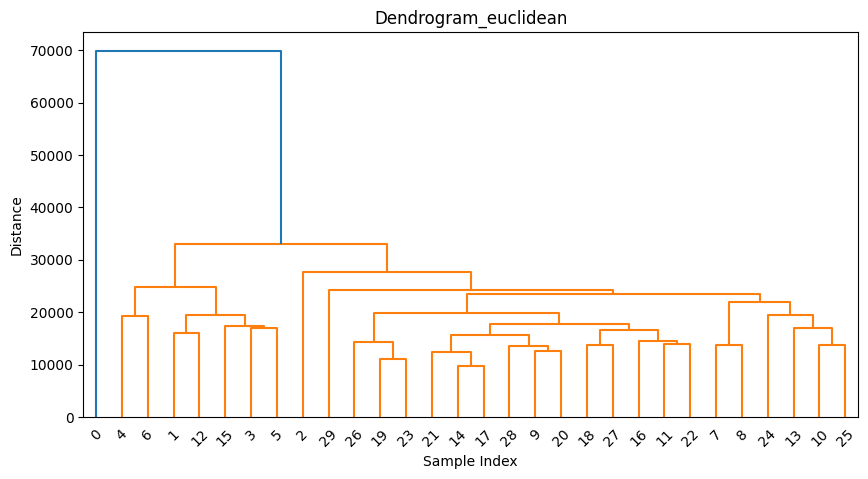

In [14]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import numpy as np


# 将欧氏距离列表转换为numpy数组
euclidean = np.array(matrix_euclidean)

# 使用hierarchy.linkage方法计算层次聚类的链接矩阵
#method single最小距离， complete最大距离，average 平均距离，centroid中心距离， ward距离
Z = hierarchy.linkage(euclidean, method='average')  

k = 5
clusters = hierarchy.fcluster(Z, k, criterion='maxclust')

# 绘制树状图
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram_euclidean')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()



In [15]:

#creat un matrix pour conserver les cos

matrix_cos = []
for i in range(30):
    ligne_vertical= []
    for j in range(30):
        vecteur_a = aaaa[i][0]['vecteur']
        vecteur_b = aaaa[j][0]['vecteur']
        ddd = sim_cos(vecteur_a, vecteur_b, len(vecteur_a))
        ligne_vertical.append(ddd)
    matrix_cos.append(ligne_vertical)

print(matrix_cos)


[[1.0, 0.829537478771726, 0.9153713478469393, 0.8570432854454046, 0.9853048235705545, 0.8700847656166153, 0.9629151232219678, 0.8914994510297449, 0.833309380051621, 0.9755875964853767, 0.7532717310033051, 0.8214001095226221, 0.8157648440993632, 0.8804617825268216, 0.8491356980088345, 0.8420051592013921, 0.9134733433303346, 0.8627346825442922, 0.9301028015343795, 0.8145881886083944, 0.9628476683694894, 0.8521951756593894, 0.8279706425918203, 0.7918769590445558, 0.7833292644864435, 0.7494451688596984, 0.7500348139505705, 0.8578144704490052, 0.8305021712992338, 0.8202619771927843], [0.829537478771726, 1.0000000000000002, 0.7937943048465562, 0.961316570697593, 0.8532440836390527, 0.955804886807784, 0.8940401292985471, 0.9620774223738267, 0.9784009299930112, 0.853963143621677, 0.9234940706363749, 0.9432795084221934, 0.9808296943468152, 0.942597911976165, 0.9548948497319629, 0.9591243391945752, 0.9317096528779076, 0.9633332187918098, 0.9419901001222956, 0.9309995478876327, 0.8875851868847113

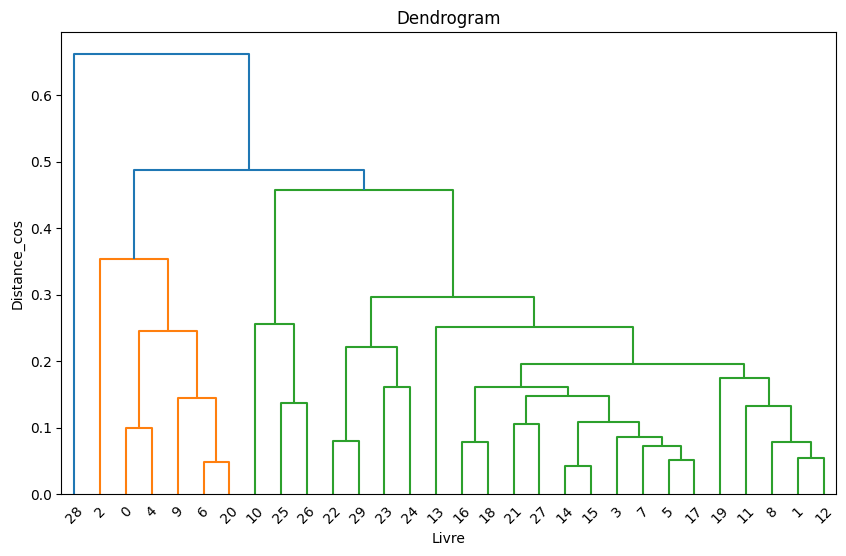

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# 从给定的余弦相似度值构造距离矩阵
distances = 1 - np.array(matrix_cos)
# 进行层次聚类
Z = linkage(distances, method='average')
# 绘制树状图
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Livre')
plt.ylabel('Distance_cos')
plt.show()


In [13]:
#test
print(len(matrix_cos[9]))

30


['01_H_A.txt']


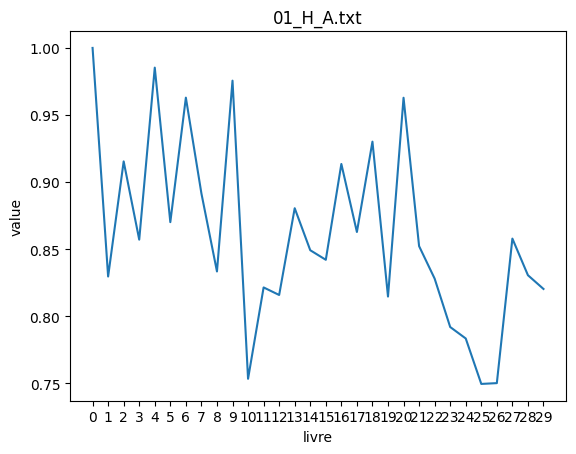

['02_S_A.txt']


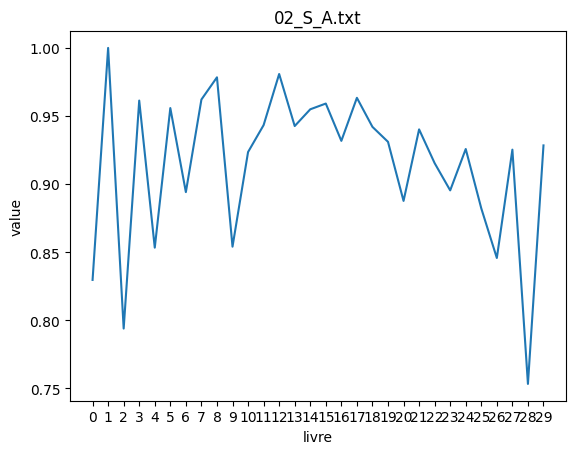

['03_Comb.txt']


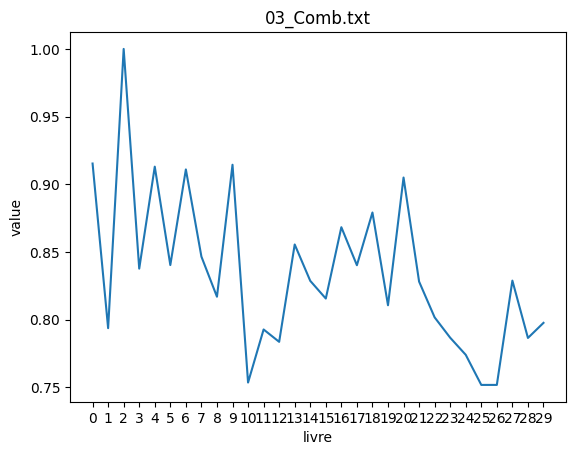

['04_Cati.txt']


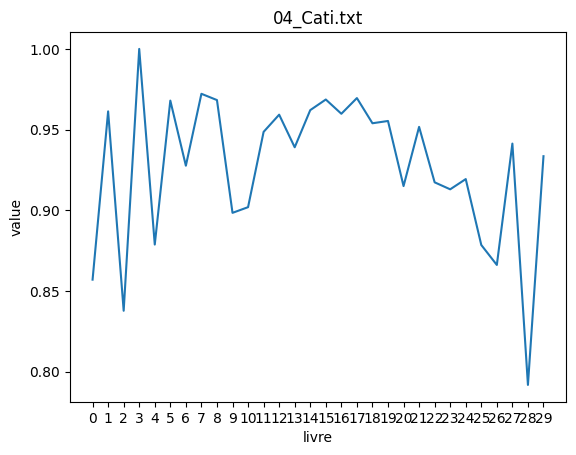

['05_Pep.txt']


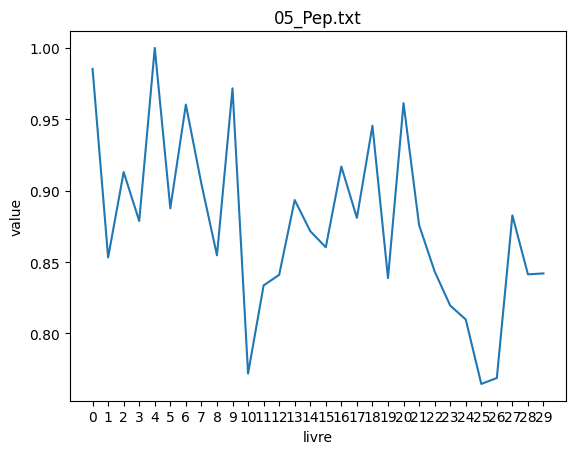

['06_At.txt']


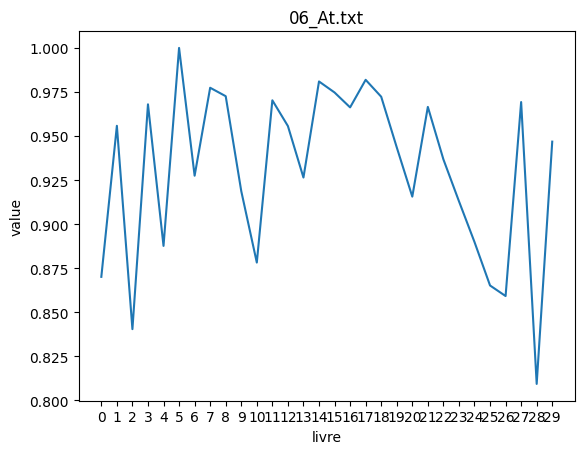

['07_Mer.txt']


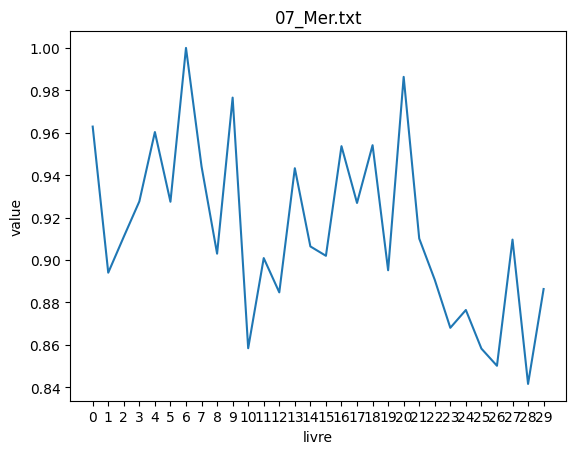

['08_S_T.txt']


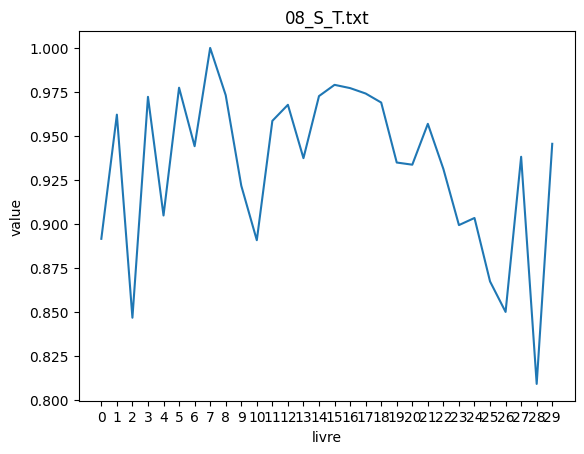

['09_M_Tubes.txt']


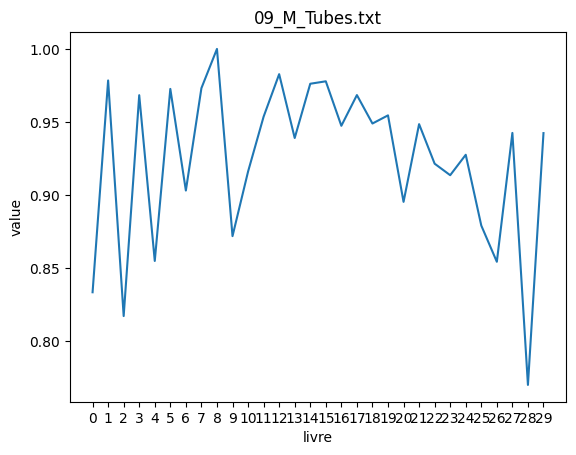

['10_Cos_E.txt']


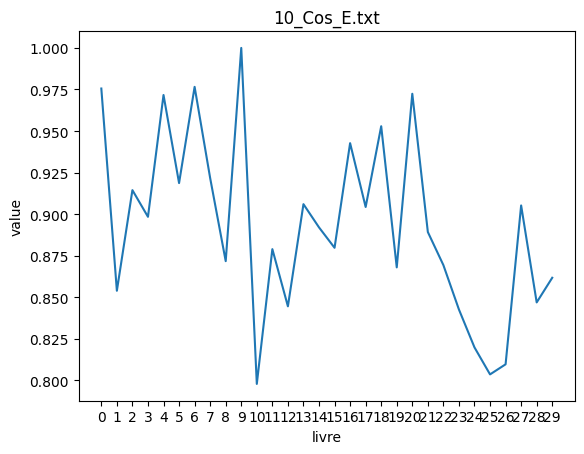

['11_R_N_P.txt']


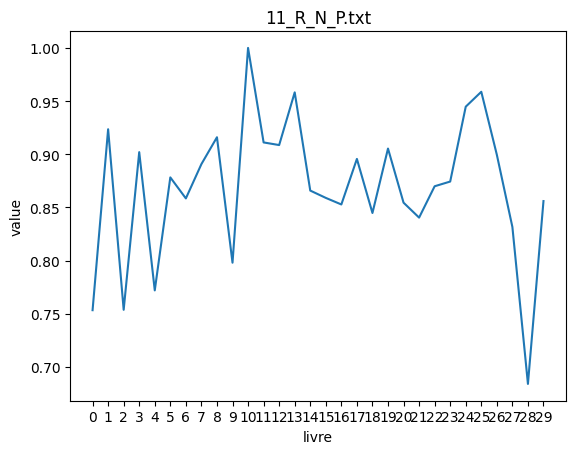

['12_Ante.txt']


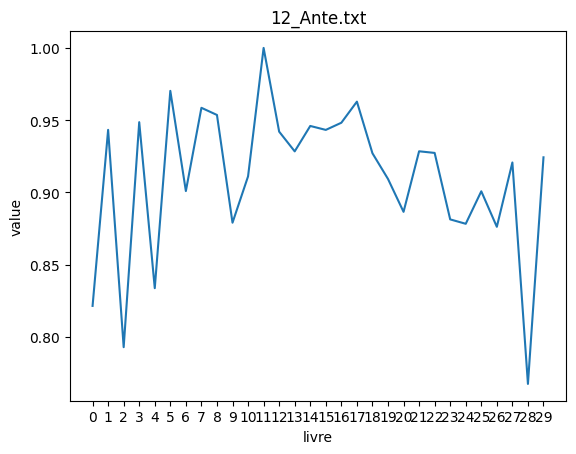

['13_B_F.txt']


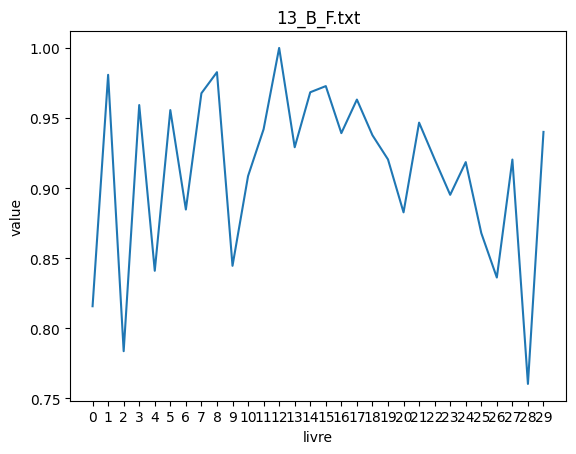

['14_A_S.txt']


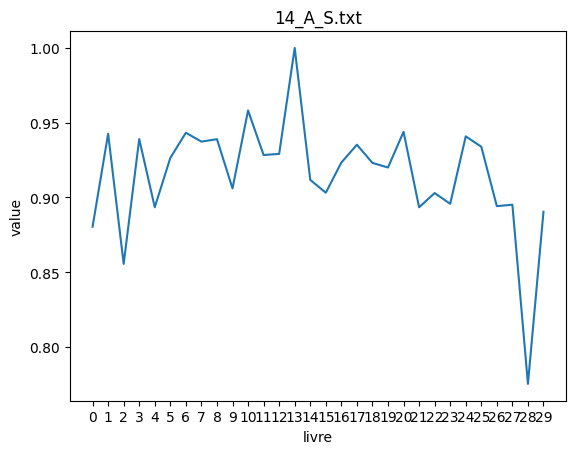

['15_J_H.txt']


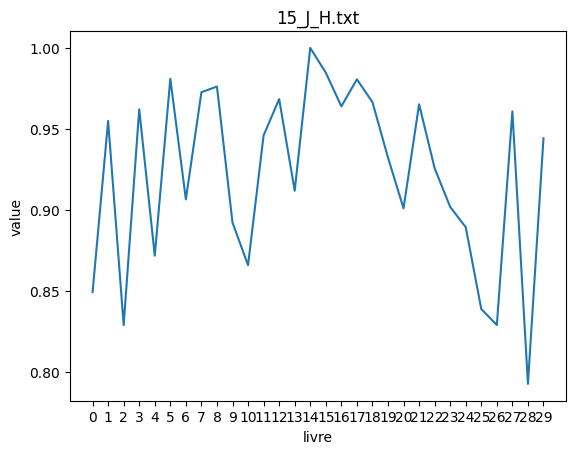

['16_E_A.txt']


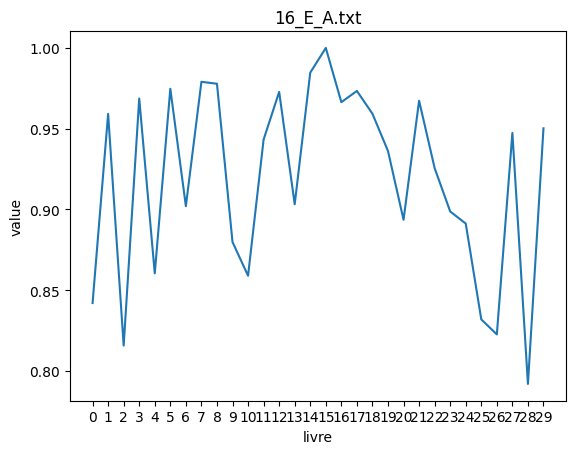

['17_F_P.txt']


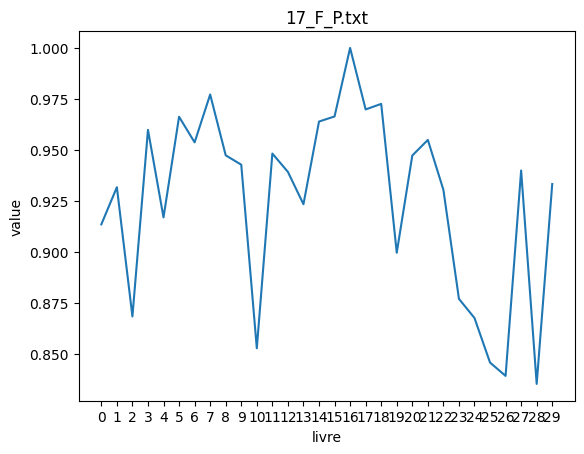

['18_V_H.txt']


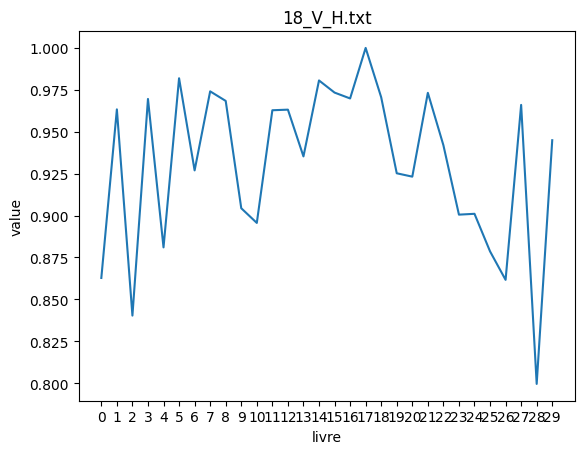

['19_F_V.txt']


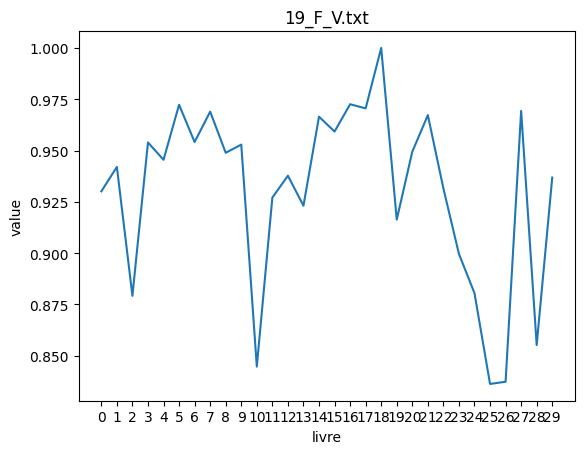

['20_T_P.txt']


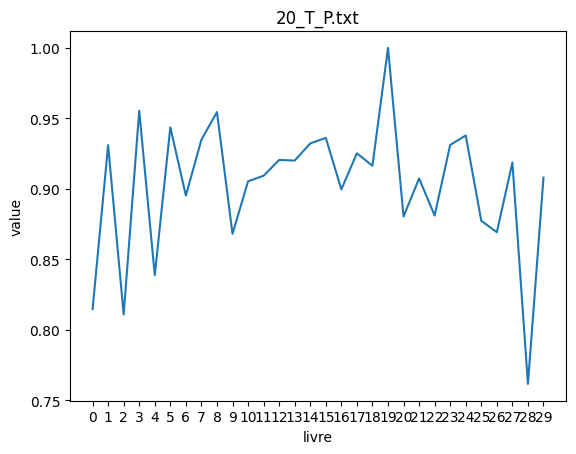

['21_B_B.txt']


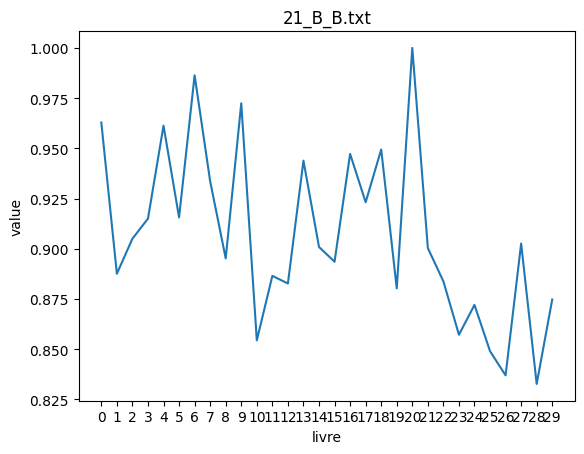

['22_N_H.txt']


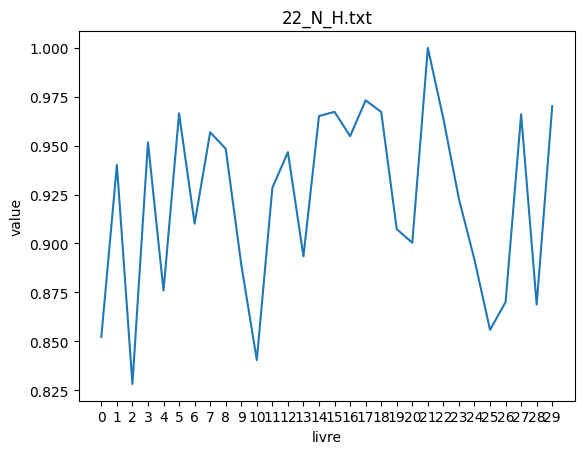

['23_Petro.txt']


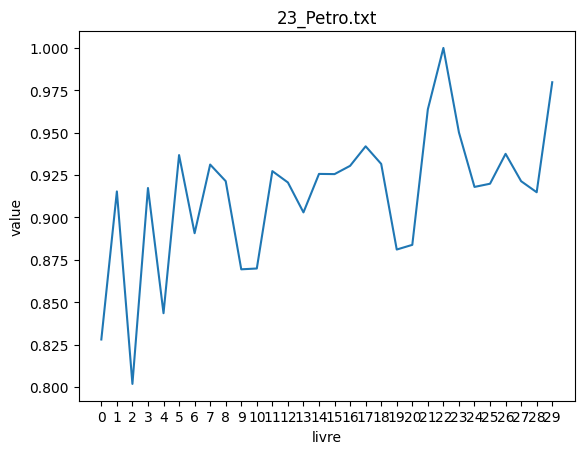

['24_C_C_N.txt']


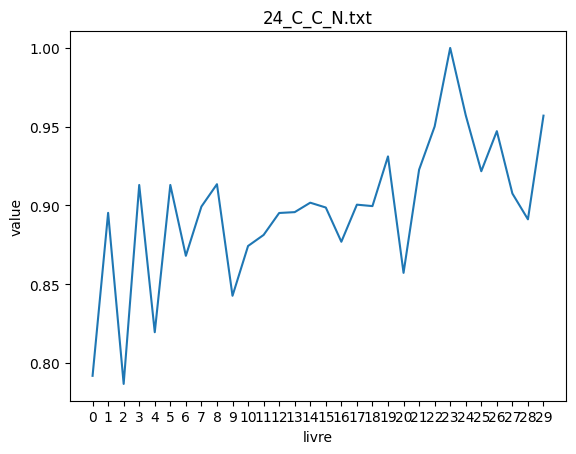

['25_R_A_H.txt']


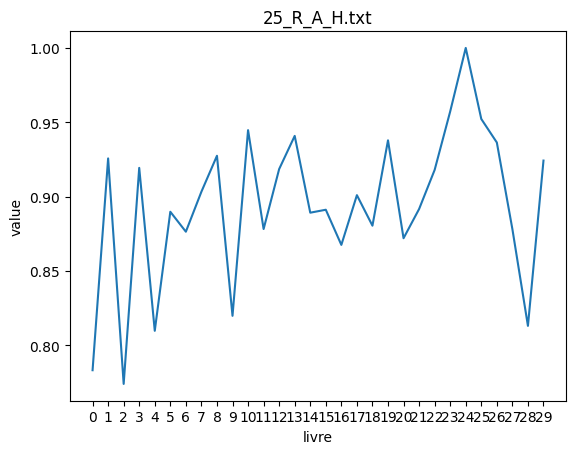

['26_F_C.txt']


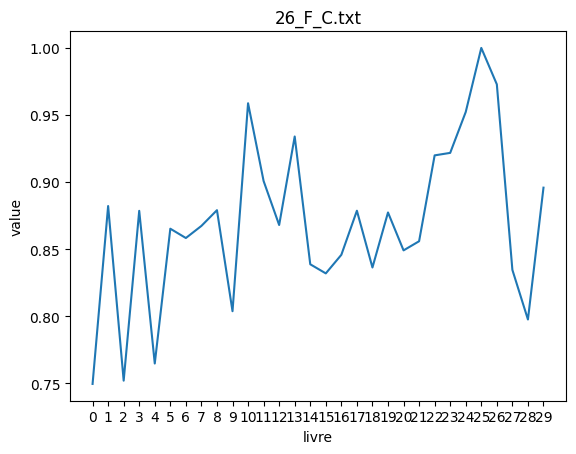

['27_P_E.txt']


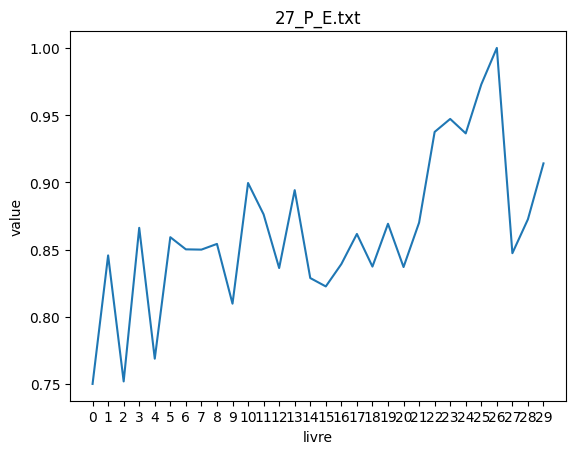

['28_Soif.txt']


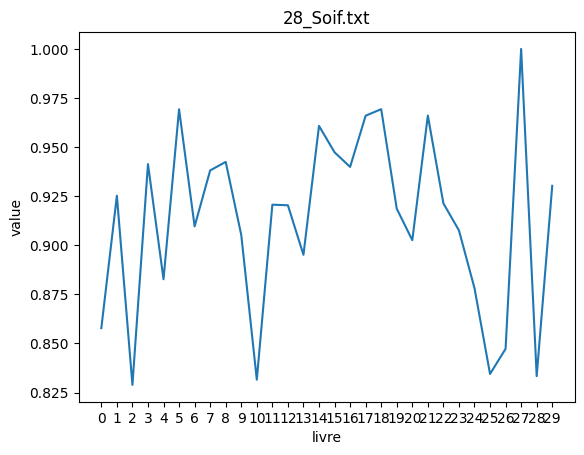

['29_L_A.txt']


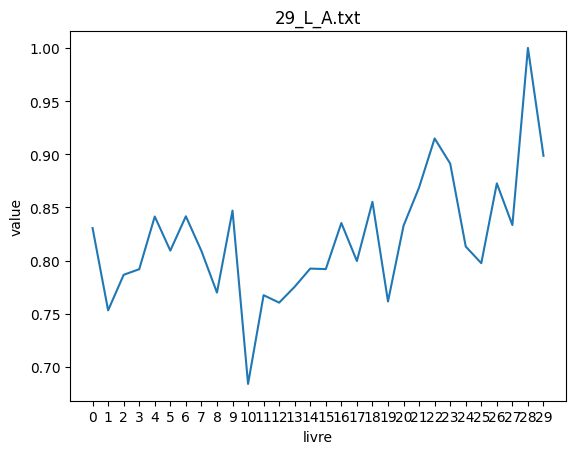

['30_P_S.txt']


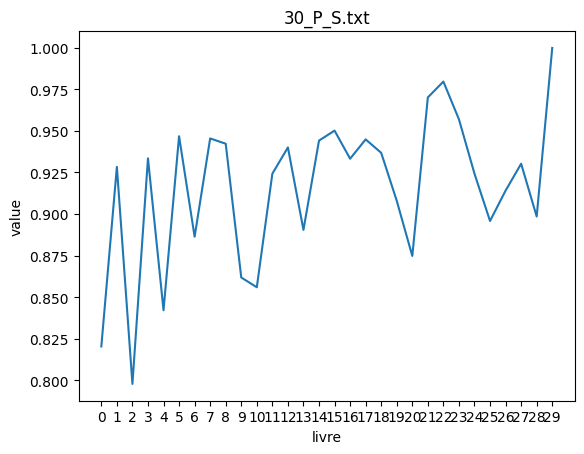

In [17]:
import matplotlib.pyplot as plt
#import numpy

for i in range(30):
    cos_livre_29livres = matrix_cos[i]
    labels =[]
    labels.append(aaaa[i][0]['label'])
    print(labels)

# 绘制 plot 图
    plt.plot(cos_livre_29livres)

    # 添加标题和标签
    plt.title(aaaa[i][0]['label'])
    plt.xlabel('livre')
    plt.xticks(range(30))
    plt.ylabel('value')

    # 显示图形
    plt.show()


In [1]:
#根据文本特征修订版
import string

def tokenize(text: str) -> list:
    prev_char = " "
    current_word = ""
    tokens = []

    for char in text:
        # 如果当前字符是标点符号或空格
        if char in string.punctuation + " " + "«» —" :
            # 如果之前的字符不是标点符号或空格
            if prev_char not in string.punctuation + " " + "«» —":
                # 添加当前单词到 tokens 列表中
                if current_word != "":
                    tokens.append(current_word)
                current_word = ""

        else:
            # 如果当前字符不是标点符号或空格，将其添加到当前单词中
            current_word = current_word + char
        
        # 更新前一个字符
        prev_char = char

    # 添加最后一个单词（如果存在）
    if current_word != "":
        tokens.append(current_word)

    return tokens



import re
def normalize(s:str):
    #用ACSII中的单引号替换右单引号
    s=s.replace("’","'")
    s=s.lower()
    return s

def deuxieme_elt(pair):
    #对hachage函数生成的dict而言，数据结构为(key,value),视为一个pair，pair中的第二项是value
    return pair[1]#返回value值构成的列表


def read_stop_words(file_name):
    stop_words=set()#？？？un equivalent de current_word in tokenisation?mais son contenu vise a enlever les bruits du tokens
    f=open(file_name,encoding="utf8",mode="r")
    for line in f:
        line=line.strip()
        stop_words.add(line)
    f.close()
    return stop_words

# filtrage des tokens par élimination des stop_words
def filter_tokens(tokens,stop_words):
    filtered_tokens=[]
    for token in tokens:
        if token not in stop_words:
            filtered_tokens.append(token)
    return filtered_tokens

def token2vec(tokens)->dict:
    tok2freq={}#dict
    # parcours des tokens et mise à jour des fréquences associées
    for token in tokens:
        if token in tok2freq.keys():
            #如果token在tok2freq字典中，则给字典中相应的token的value+1
            tok2freq[token]=tok2freq[token]+1
        else:
            #否则token 的 value 始终等于1
            tok2freq[token]=1
            
    return tok2freq

def token2vec_uni(tokens_total,tokens)->dict:
    tok2freq={}#dict
    # parcours des tokens et mise à jour des fréquences associées
    for token in tokens:
        if token in tok2freq.keys():
            #如果token在tok2freq字典中，则给字典中相应的token的value+1
            tok2freq[token]=tok2freq[token]+1
        else:
            #否则token 的 value 始终等于1
            tok2freq[token]=1
            
    return tok2freq

            
def labeliser(label:str, vecteur:dict) -> list:
    labels_vecteurs_list = [] 
    label_vecteur = {
        "label":label,
        "vecteur": vecteur
    }
    
    labels_vecteurs_list.append(label_vecteur) 
    return labels_vecteurs_list
        
    
def combine_files(files_list)->list:
    total_contenu_list= []
    total_str = ""
    my_files = "/Users/juliezhao/Desktop/cluster_30_AN/livre_A_N"
    
    for i in range (len(files_list)):
        label = files_list[i]
        my_file_path_current = my_files+'/'+label
        my_file_current = open(my_file_path_current,mode = 'r', encoding='utf8')
        my_file_conteneur = my_file_current.read()
    total_str += my_file_conteneur
    total_str_normalized = normalize(total_str)
    total_list_normalized_tokenized = tokenize(total_str_normalized)
    stop_words = read_stop_words("/Users/juliezhao/Desktop/cluster_30_AN/stopword.rtf")
    total_contenu_list = filter_tokens(total_list_normalized_tokenized,stop_words)
        
    
    return total_contenu_list



def generate_vector(word_list, doc):
    vector = {}
    for word in word_list:
        vector[word] = doc.count(word)
    return vector
